<a href="https://colab.research.google.com/github/Siddharth131020/Machine-learning/blob/main/CNN_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
folders = os.listdir('/content/drive/MyDrive/CNN')

In [13]:

folders

['cats', 'dogs', 'horses', 'humans']

In [14]:
path = '/content/drive/MyDrive/CNN/'
for i in folders:
  print(i, len(os.listdir(path+i)))

cats 181
dogs 181
horses 181
humans 181


In [15]:
import keras.utils as image
import matplotlib.pyplot as plt

In [16]:
img = image.load_img('/content/drive/MyDrive/CNN/horses/horse-101.jpg')


In [17]:
img = image.img_to_array(img)/255


In [18]:
img.shape


(183, 275, 3)

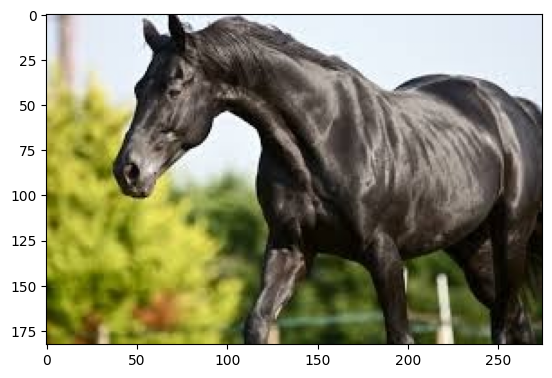

In [19]:
plt.imshow(img)
plt.show()

In [20]:
from keras.preprocessing.image import ImageDataGenerator

In [21]:
train_set = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    shear_range=0.2,
    zoom_range=0.2
)

In [22]:
train_gen = train_set.flow_from_directory(path,
                                         target_size = (224, 224),
                                         batch_size = 32,
                                         class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [23]:

for i, j in train_gen:
    print(i.shape, j.shape)
    break

(32, 224, 224, 3) (32, 4)


[0. 0. 1. 0.]


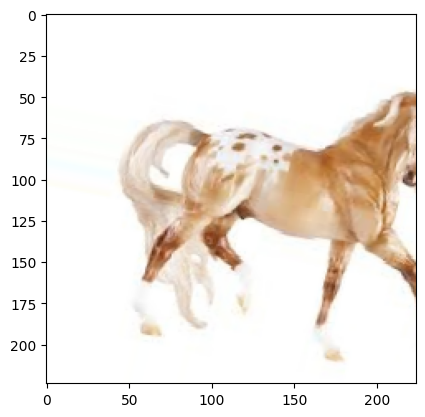

In [24]:
plt.imshow(i[26])
print(j[26])

In [25]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [26]:
base_model = ResNet50(weights='imagenet', include_top = False, input_shape = (224, 224, 3))


94765736/94765736 [==============================] - 0s 0us/step


In [27]:
base_model.summary()


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [28]:
for layer in base_model.layers:
    layer.trainable = True

In [29]:
output = base_model.output
output = GlobalAveragePooling2D()(output)
output = Dense(4, activation = 'softmax')(output)

In [30]:
model = Model(inputs = base_model.input, outputs = output)


In [31]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [32]:
import tensorflow as tf
from tensorflow.keras import optimizers
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer = 'adam', metrics = ['accuracy'])

In [33]:
hist = model.fit_generator(train_gen, epochs = 15)


<ipython-input-33-56cb51bf8221>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_gen, epochs = 15)


Epoch 1/15
23/23 [==============================] - 421s 17s/step - loss: 1.1823 - accuracy: 0.6602
Epoch 2/15
23/23 [==============================] - 384s 17s/step - loss: 0.8752 - accuracy: 0.7486
Epoch 3/15
23/23 [==============================] - 387s 17s/step - loss: 0.5787 - accuracy: 0.7997
Epoch 4/15
23/23 [==============================] - 385s 17s/step - loss: 0.3774 - accuracy: 0.8702
Epoch 5/15
23/23 [==============================] - 384s 17s/step - loss: 0.2923 - accuracy: 0.8826
Epoch 6/15
23/23 [==============================] - 389s 17s/step - loss: 0.2165 - accuracy: 0.9227
Epoch 7/15
23/23 [==============================] - 392s 17s/step - loss: 0.2573 - accuracy: 0.9157
Epoch 8/15
23/23 [==============================] - 384s 17s/step - loss: 0.1640 - accuracy: 0.9517
Epoch 9/15
23/23 [==============================] - 380s 16s/step - loss: 0.1998 - accuracy: 0.9227
Epoch 10/15
23/23 [==============================] - 382s 17s/step - loss: 0.3015 - accuracy: 0.8950